In [20]:
from textblob import TextBlob
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
import zipfile
import pandas as pd

# Specify the zip file path
zip_file_path = '/content/Data (3).zip'

# Specify the CSV file to read within the zip
csv_file_name = 'twitter_training.csv'  # or 'twitter_validation.csv'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Read the specific CSV file into a pandas DataFrame
    with zip_ref.open(csv_file_name) as file:
        df = pd.read_csv(file)

In [22]:
print(df.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [23]:
import zipfile
import pandas as pd

# Specify the zip file path
zip_file_path = '/content/Data (3).zip'

# Specify the CSV file to read within the zip
csv_file_name = 'twitter_training.csv'  # or 'twitter_validation.csv'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Read the specific CSV file into a pandas DataFrame
    with zip_ref.open(csv_file_name) as file:
        df = pd.read_csv(file, names=["id", "entity", "sentiment", "content"], header=None) #Added names and header=None

# Print the first few rows of the DataFrame to inspect its structure
df.head()

,id,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('content').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('content')):
  _plot_series(series, series_name, i)
  fig.legend(title='content', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

In [13]:
!pip install textblob nltk pandas matplotlib seaborn wordcloud

In [24]:
import zipfile
import pandas as pd
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download required NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')  # Download for VADER sentiment analysis

# Load the data
zip_file_path = '/content/Data (3).zip'
csv_file_name = 'twitter_training.csv'  # or 'twitter_validation.csv'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(csv_file_name) as file:
        # Assuming the tweet text is in the 'content' column, change 'text' to 'content'
        df = pd.read_csv(file, names=["id", "entity", "sentiment", "content"], header=None)

# 1. Basic Sentiment Analysis using TextBlob
# Convert the 'content' column to string type before applying TextBlob
df['sentiment_score'] = df['content'].astype(str).apply(lambda text: TextBlob(text).sentiment.polarity)

# 2. Categorize Sentiment
df['sentiment_category'] = pd.cut(df['sentiment_score'],
                                   bins=[-1, -0.05, 0.05, 1],
                                   labels=['Negative', 'Neutral', 'Positive'])

# ... (Rest of the code remains the same)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


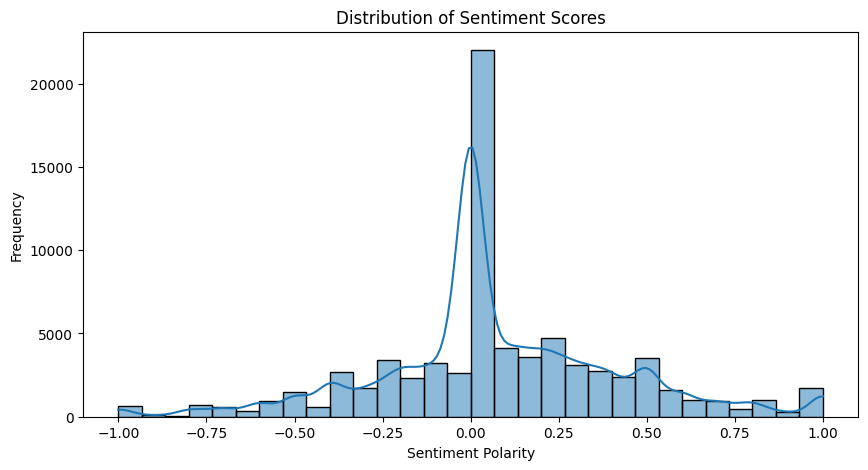

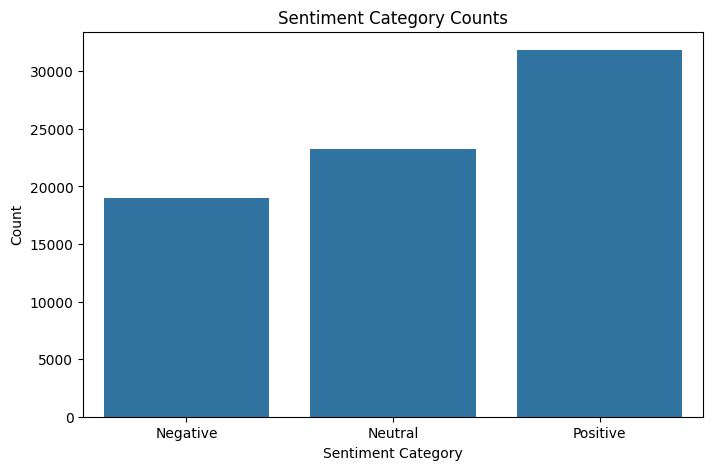

In [25]:
# 3. Visualizations
# a. Distribution of Sentiment Scores
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# b. Sentiment Category Counts
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_category', data=df)
plt.title('Sentiment Category Counts')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


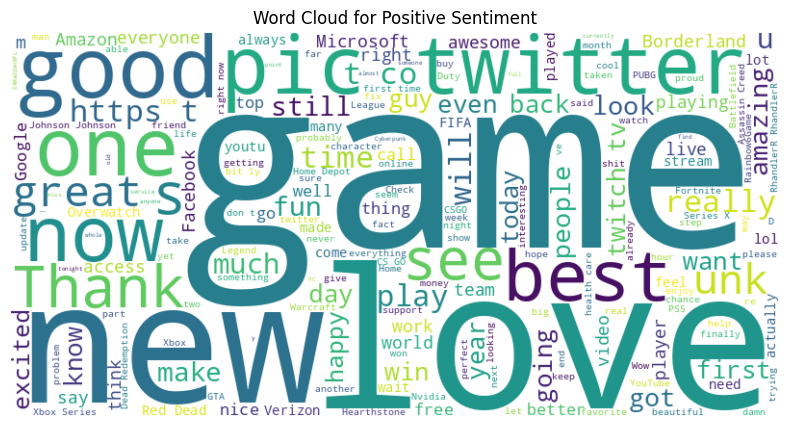

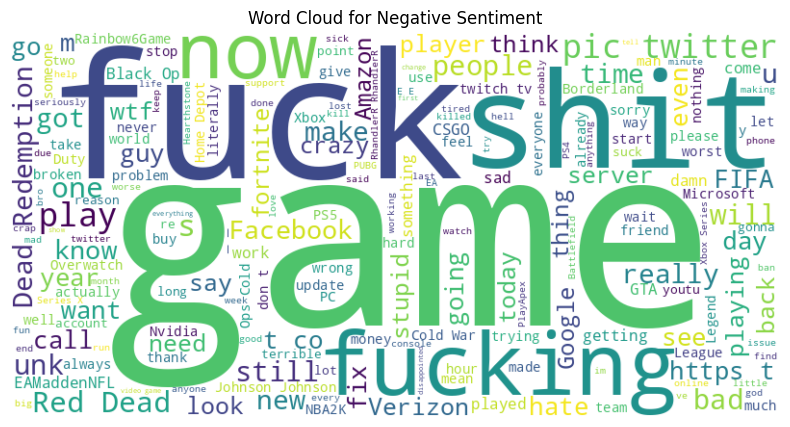

In [26]:
# c. Word Cloud for Positive and Negative Sentiments
def create_wordcloud(text, sentiment):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

# Access the 'content' column instead of 'text'
positive_text = ' '.join(df[df['sentiment_category'] == 'Positive']['content'])
negative_text = ' '.join(df[df['sentiment_category'] == 'Negative']['content'])

create_wordcloud(positive_text, 'Positive')
create_wordcloud(negative_text, 'Negative')


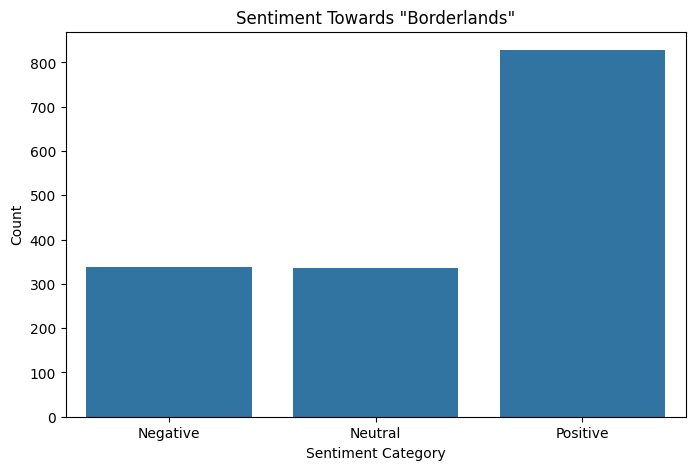

Average sentiment for 'Borderlands': 0.16009888799077035


In [27]:
# 4. Analyze Sentiment Towards Specific Topics or Brands (Example)
# Replace 'your_keyword' with the topic or brand you want to analyze
keyword = 'Borderlands'
# Access the 'content' column instead of 'text'
# Add na=False to handle NaN values in the 'content' column
topic_df = df[df['content'].str.contains(keyword, case=False, na=False)]

plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_category', data=topic_df)
plt.title(f'Sentiment Towards "{keyword}"')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

print(f"Average sentiment for '{keyword}':", topic_df['sentiment_score'].mean())
